In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlretrieve
import requests
import os
payload = {
    'gage': 'all',
    'gc': 'gc' # important
}
try:
  os.mkdir("images")
except:
  pass
year = 2015
root_url = 'http://www.getchu.com'
origin_url = "http://www.getchu.com/soft.phtml?id=843492&gc=gc"
game_page_res = requests.get(origin_url, params = {'gc': 'gc'})
print(game_page_res.url)
game_page_soup = BeautifulSoup(game_page_res.text, 'html.parser')
# print(game_page_soup.text)
img_tags = game_page_soup.find_all('img', attrs = { 'alt': lambda x : x and 'キャラ' in x})
# print(img_tags)
character_tags = [root_url + tag.attrs['src'][1:] for tag in img_tags]
print(character_tags)
character_counter = 0
for character in character_tags:
  res = requests.get(character, headers={'referer': game_page_res.url})
  # print(res.content)
  img_bytestr = res.content
  with open('./images/{}_{}.jpg'.format(year, character_counter), 'wb') as img_f:
    img_f.write(img_bytestr)
  character_counter += 1

http://www.getchu.com/soft.phtml?id=843492&gc=gc&gc=gc
['http://www.getchu.com/brandnew/843492/c843492chara1.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara2.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara3.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara4.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara5.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara6.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara7.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara8.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara9.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara10.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara11.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara12.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara13.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara14.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara15.jpg', 'http://www.getchu.com/brandnew/843492/c843492chara16

In [ ]:
import cv2
import sys
import os
import os.path
import shutil

def detect(filename, outname, cascade_file = "./lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    if len(faces) > 0:
        x, y, w, h = faces[0]
        #print(x, y, w, h)
        cv2.imwrite(outname, image[int(y-0.1*h): int(y+0.9*h), x: x+w])
        return True
    else:
        return False

ct = 0
os.mkdir('cropped')

for y in range(2015, 2016):
    img_dir = './images'
    files = os.listdir(img_dir)
    for f in files:
        if detect(os.path.join(img_dir, f), './cropped/{}_{}.jpg'.format(ct, y)):
            ct += 1
            print(ct)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


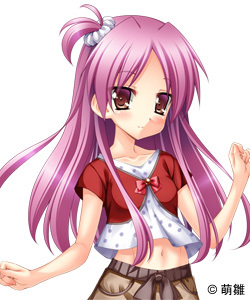

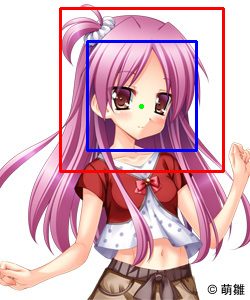

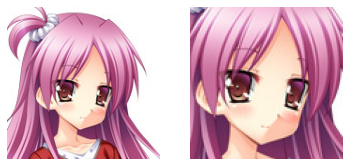

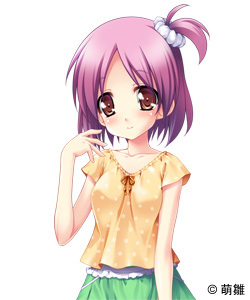

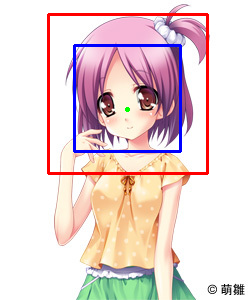

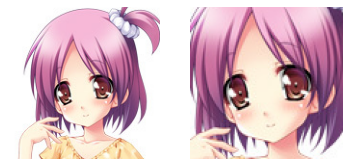

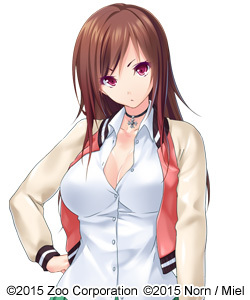

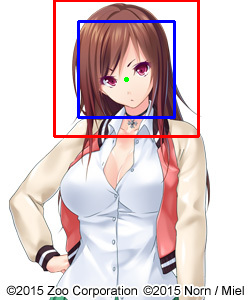

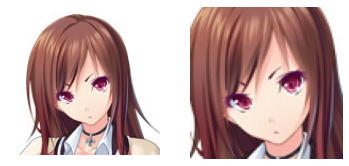

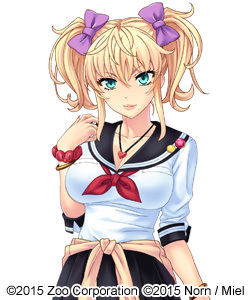

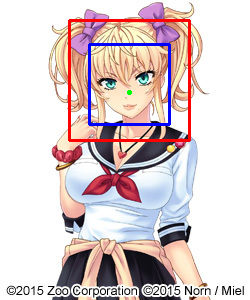

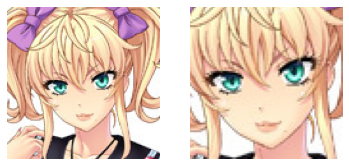

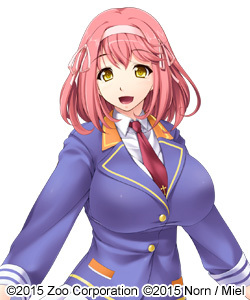

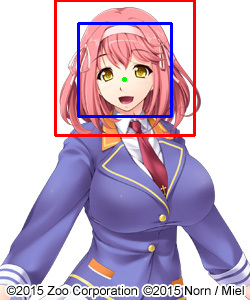

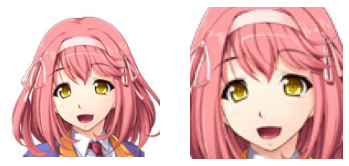

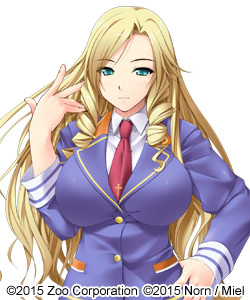

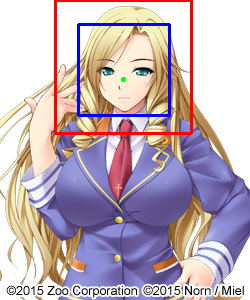

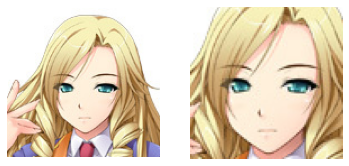

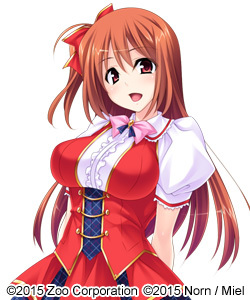

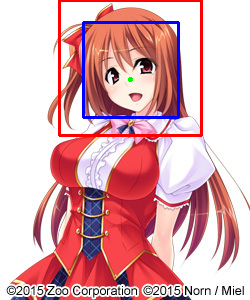

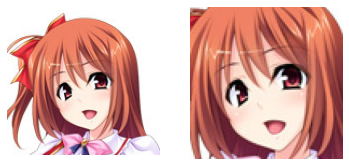

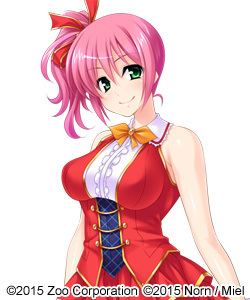

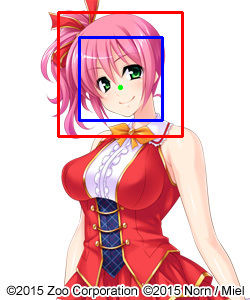

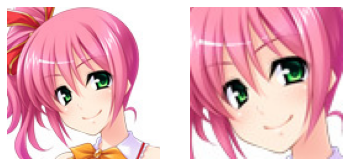

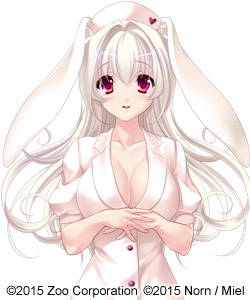

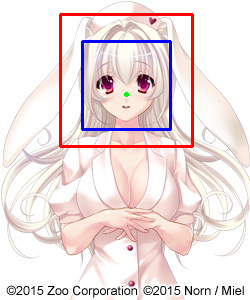

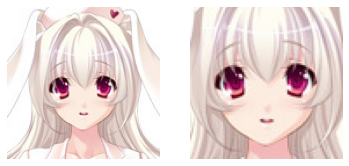

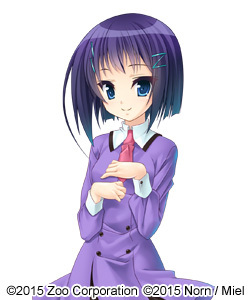

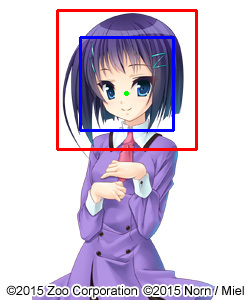

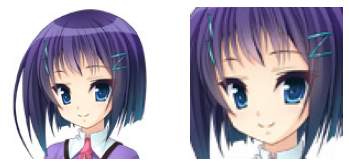

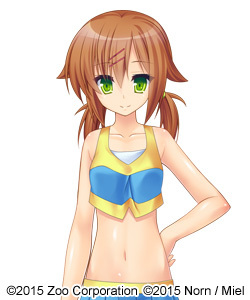

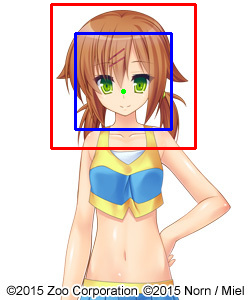

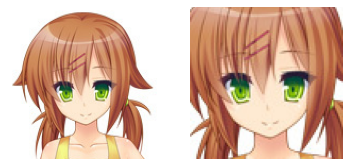

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/drive/Shareddrives/AnimeGAN/all_images_by_year_month/2015/01/2015_3.jpg", cv2.IMREAD_COLOR)
images_folder = "/content/drive/Shareddrives/AnimeGAN/all_images_by_year_month/2015/01"
images_names = os.listdir(images_folder)
# to_display = len(images_names)
to_display = 10
index = 1
for image_name in images_names[:to_display + 1]:
  image_path = images_folder + "/" + image_name
  cascade = cv2.CascadeClassifier("/content/drive/Shareddrives/AnimeGAN/lbpcascade_animeface.xml")
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  image_to_draw = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.equalizeHist(gray)
  cv2_imshow(image)
  # cv2_imshow(gray)

  faces = cascade.detectMultiScale(gray,
                                    # detector options
                                    scaleFactor = 1.1,
                                    minNeighbors = 5,
                                    minSize = (24, 24))
  # print(faces)
  if len(faces) > 0:
    x, y, w, h = faces[0]
    # TODO: Do experiment on this image to center the bounding box
    # w = int(w * 1.4)
    # h = int(h * 1.4)
    c_x = x + int(w / 2)
    c_y = y + int(h / 2)
    new_w = int(w * 1.5)
    new_h = int(h * 1.5)
    new_x = c_x - int(new_w / 2)
    new_y = c_y - int(new_h / 2)
    new_x = 0 if new_x <= 0 else new_x
    new_y = 0 if new_y <= 0 else new_y
    start_y = max(int(new_y - 0.1 * new_h), 0)
    end_y = int(new_y + 0.9 * new_h)
    start_initial_y = max(int(y - 0.1 * h), 0)
    end_initial_y = int(y + 0.9 * h)
    # print(new_x, new_y)
    # print(x)
    # cv2.rectangle(image_to_draw, (int(x - 0.1*w), int(y - 0.1*h)), (int(x + 0.9*w), int(y+0.9*h)), (255, 0, 0), 2)
    cv2.rectangle(image_to_draw, (x, start_initial_y), (x + w, end_initial_y), (255, 0, 0), 2)
    cv2.circle(image_to_draw, (c_x, c_y), 1, (0, 255, 0), 2)
    cv2.rectangle(image_to_draw, (new_x, start_y), (new_x + new_w, end_y), (0, 0, 255), 2)
    cv2_imshow(image_to_draw)
    # cv2_imshow(image[int(y-0.1*h): int(y+0.9*h), x: x+w])
    # print(int(new_y - 0.1 * new_h))
    # print(start_y)
    sub_image_1 = image[start_y : end_y, int(new_x) : int(new_x + new_w)]
    sub_image_1 = cv2.cvtColor(sub_image_1, cv2.COLOR_BGR2RGB)
    sub_image_2 = image[start_initial_y : end_initial_y, x:x + w]
    sub_image_2 = cv2.cvtColor(sub_image_2, cv2.COLOR_BGR2RGB)
    # sub_image = cv2.resize(sub_image, (224, 224))
    # cv2_imshow(sub_image)
    plt.subplot(1,2, 1)
    plt.imshow(sub_image_1)
    plt.axis("off")
    plt.subplot(1,2, 2)
    plt.imshow(sub_image_2)
    plt.axis("off")
    plt.show()
    # print(sub_image.shape)
    index += 1

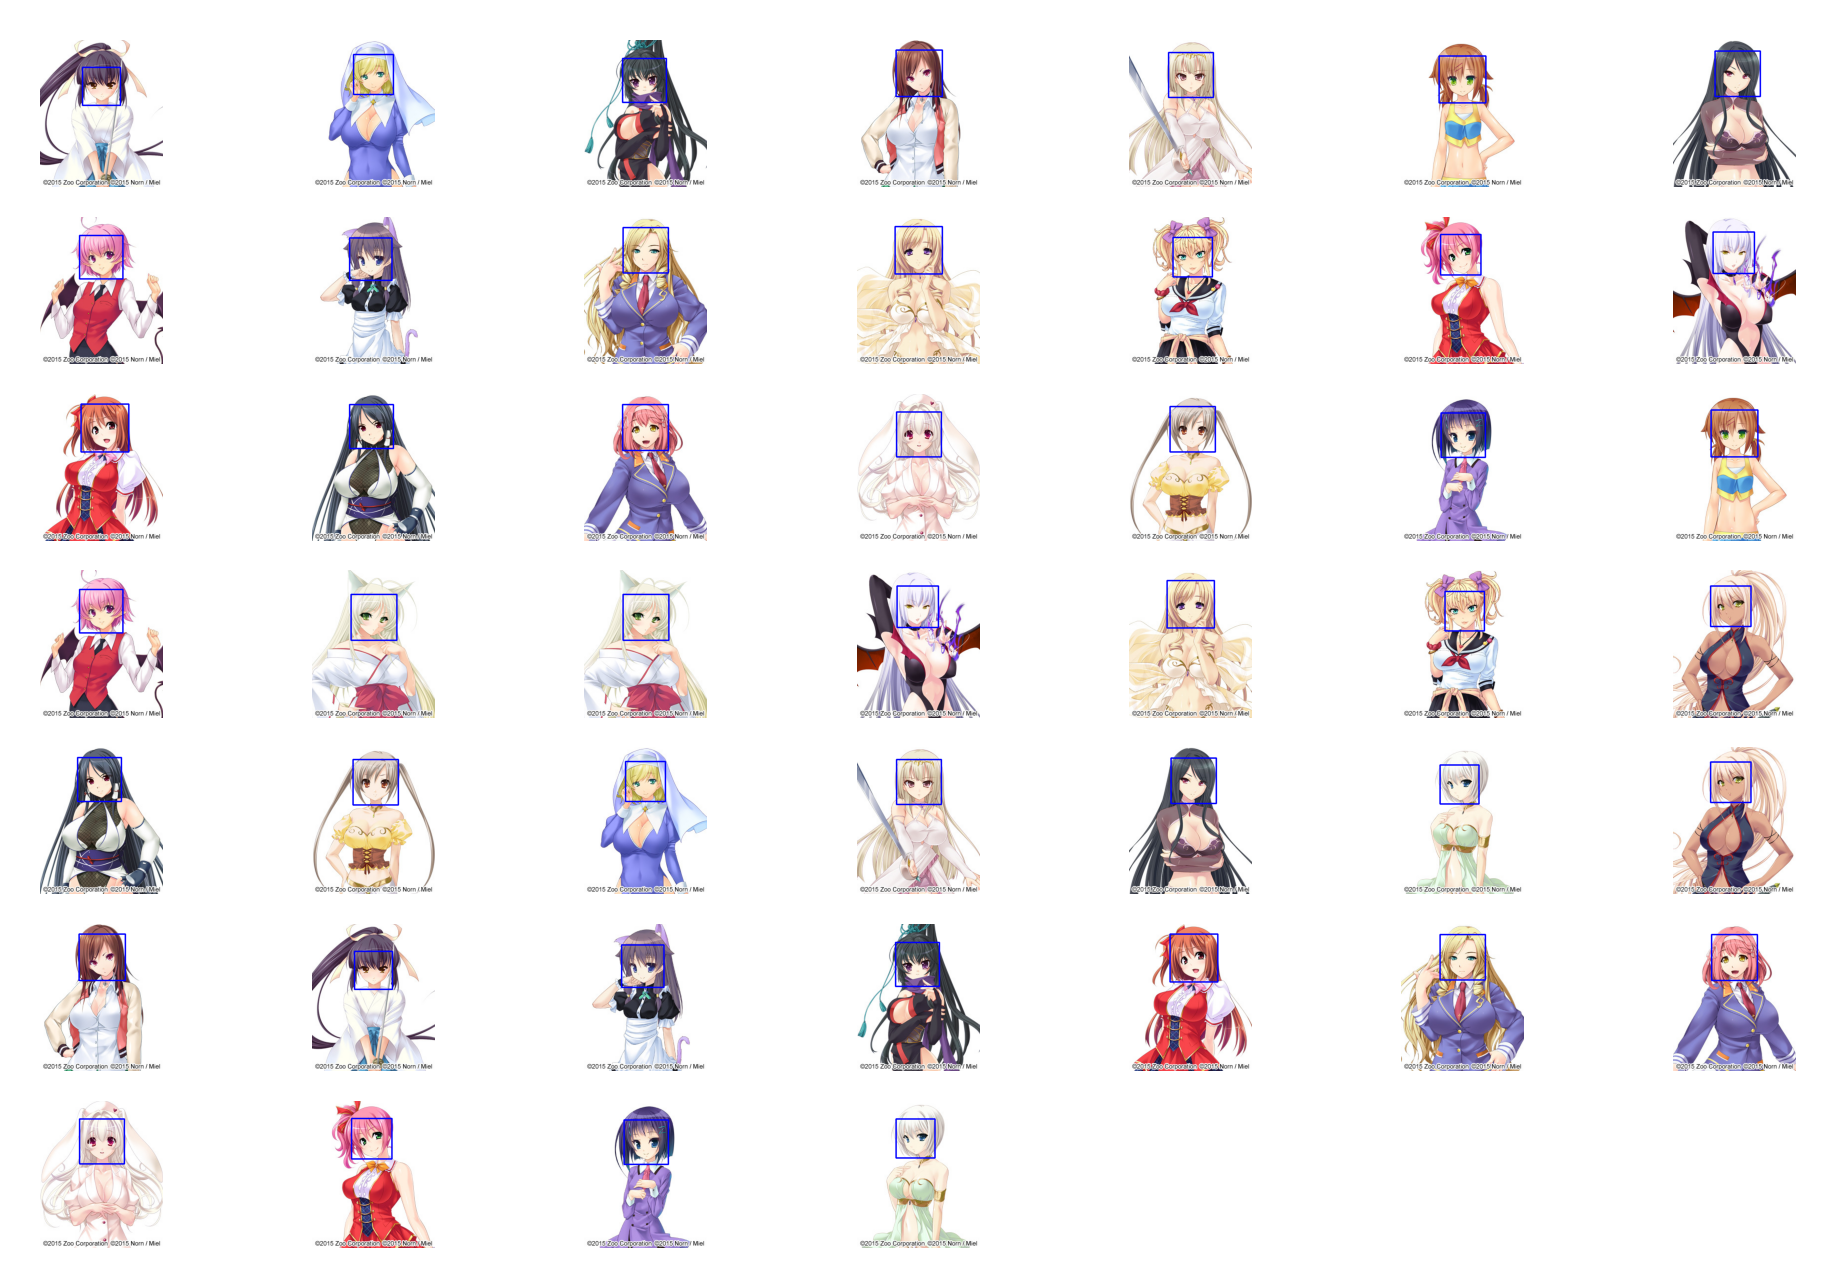

In [ ]:
import matplotlib.pyplot as plt
index = 1
fig = plt.figure(dpi=400)
all_images = os.listdir("./images")
for single_image in all_images:
  image_path = "./images/" + single_image
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_gray = cv2.equalizeHist(image_gray)
  cascade = cv2.CascadeClassifier("/content/lbpcascade_animeface.xml")
  faces = cascade.detectMultiScale(image_gray,
                                   scaleFactor=1.01,
                                   minNeighbors=1)
  if len(faces) > 0:
    x, y, w, h = faces[0]
    cv2.rectangle(image, (x, int(y - 0.1*h)), (x + w, int(y + 0.9*h)), (255, 0, 0), 2)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(7, 7, index)
    plt.imshow(image)
    plt.axis("off")
    index += 1

In [ ]:
import os
def create_directory(dir_name):
  try:
    os.mkdir(dir_name)
  except:
    return

In [ ]:
import requests
from bs4 import BeautifulSoup
def get_games_by_year_month(payload, year, month, game_type):
  game_year_and_month_request = requests.get(y_m_url, params = {**payload, 'year': year, 'month': month, 'genre': game_type})
  print(game_year_and_month_request.url)
  game_year_and_month_soup = BeautifulSoup(game_year_and_month_request.text, 'html.parser')
  game_elems = game_year_and_month_soup.find_all("td", {'class': 'dd'})
  return game_elems

In [ ]:
import requests
from bs4 import BeautifulSoup
def get_characters_tags(complete_game_url):
  game_page = requests.get(complete_game_url, params={'gc': 'gc'})
  # print(game_page.url)
  game_page_soup = BeautifulSoup(game_page.text, 'html.parser')
  images_elems = game_page_soup.find_all("img", attrs={'alt': lambda x: x and 'キャラ' in x}) # キャラ should be in the alt attribute of the tag
  character_tags = [root_url + tag.attrs['src'][1:] for tag in images_elems]
  return game_page, character_tags

In [ ]:
import requests
def retrive_image_from_url(character, referer_url):
  image_req = requests.get(character, headers={'referer': referer_url})
  img_bytestr = image_req.content
  return img_bytestr

In [ ]:
def save_retrived_image(dest_dir, year, month, images_count):
  with open('{}/{}_{}_{}.jpg'.format(dest_dir, year, month, images_count), 'wb') as img_f:
    img_f.write(img_bytestr)

In [ ]:
def display_retrive_error_message(url, retries, max_retries = 5):
  print(f"Fail to fetch the url {url}")
  retries += 1
  if retries == max_retries:
    print(f"Reached maximum number of retries for url {url}")
    return 0
  return retries

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
from bs4 import BeautifulSoup
import requests
from tqdm.auto import tqdm

# all_images_dir = "/content/drive/Shareddrives/NewAnimeGAN/all_images_by_year_month"
female_images_dir = "/content/drive/Shareddrives/NewAnimeGAN/female_images_by_year_month"
# create_directory(all_images_dir)
create_directory(female_images_dir)

root_url = "http://www.getchu.com"
y_m_url = "http://www.getchu.com/all/month_title.html"

payload = {
    'gage': 'all',
    'gc': 'gc'
}

max_retries = 2
years = [str(y) for y in range(2018, 2022)]
months = [str(m).zfill(2) for m in list(range(1, 13))]
game_types = ['pc_soft', 'dvd_game']

# Loop through the years
for year in years:
  images_count = 1
  # all_images_year_dir = all_images_dir + "/" + year
  female_images_year_dir = female_images_dir + "/" + year

  # create_directory(all_images_year_dir)
  create_directory(female_images_year_dir)


  # Loop through the months of the year
  for month in months:
    # all_images_month_dir = all_images_year_dir + "/" + month
    female_images_month_dir = female_images_year_dir + "/" + month

    # create_directory(all_images_month_dir)
    create_directory(female_images_month_dir)

    print(f"Scraping images for year {year} and month {month}")
    # Loop through the game types (pc or dvd)
    for game_type in game_types:
      success = False
      retries = 0
      while not success:
        # try:
          # Get all html tags of each game published that month of that year of that game_type
          game_elems = get_games_by_year_month(payload, year, month, game_type)
          # success = True
          # Loop through all game elements and get a game's url
          for game_elem in tqdm(game_elems):
            game_link = game_elem.find("a").attrs['href']
            # print(game_link)
            complete_game_url = root_url + game_link
            # print(complete_game_url)
            success = False
            retries = 0
            while not success:
              # try:
                # Get the characters' tags of a single game
                game_page, character_tags = get_characters_tags(complete_game_url)
                # Loop through all the characters and retrive their image
                for character in character_tags:
                  # print("Referer: " + game_page.url)
                  # print(character)
                  try:
                    img_bytestr = retrive_image_from_url(character, referer_url=game_page.url)
                  except:
                    pass

                  # save_retrived_image(dest_dir=all_images_month_dir, year=year, month=month, images_count=images_count)
                  save_retrived_image(dest_dir=female_images_month_dir, year=year, month=month, images_count=images_count)

                  images_count += 1
                success = True
        #       except:
        #         retries = display_retrive_error_message(complete_game_url, retries)
        #         success = True
        # except:
        #   retries = display_retrive_error_message(y_m_url, retries)
        #   success = True

Scraping images for year 2018 and month 01
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=01&genre=pc_soft


  0%|          | 0/44 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=01&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2018 and month 02
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=02&genre=pc_soft


  0%|          | 0/47 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=02&genre=dvd_game


  0%|          | 0/24 [00:00<?, ?it/s]

Scraping images for year 2018 and month 03
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=03&genre=pc_soft


  0%|          | 0/69 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=03&genre=dvd_game


  0%|          | 0/23 [00:00<?, ?it/s]

Scraping images for year 2018 and month 04
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=04&genre=pc_soft


  0%|          | 0/53 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=04&genre=dvd_game


  0%|          | 0/24 [00:00<?, ?it/s]

Scraping images for year 2018 and month 05
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=05&genre=pc_soft


  0%|          | 0/58 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=05&genre=dvd_game


  0%|          | 0/15 [00:00<?, ?it/s]

Scraping images for year 2018 and month 06
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=06&genre=pc_soft


  0%|          | 0/46 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=06&genre=dvd_game


  0%|          | 0/23 [00:00<?, ?it/s]

Scraping images for year 2018 and month 07
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=07&genre=pc_soft


  0%|          | 0/48 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=07&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2018 and month 08
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=08&genre=pc_soft


  0%|          | 0/43 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=08&genre=dvd_game


  0%|          | 0/23 [00:00<?, ?it/s]

Scraping images for year 2018 and month 09
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=09&genre=pc_soft


  0%|          | 0/53 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=09&genre=dvd_game


  0%|          | 0/20 [00:00<?, ?it/s]

Scraping images for year 2018 and month 10
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=10&genre=pc_soft


  0%|          | 0/33 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=10&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2018 and month 11
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=11&genre=pc_soft


  0%|          | 0/42 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=11&genre=dvd_game


  0%|          | 0/17 [00:00<?, ?it/s]

Scraping images for year 2018 and month 12
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=12&genre=pc_soft


  0%|          | 0/50 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2018&month=12&genre=dvd_game


  0%|          | 0/19 [00:00<?, ?it/s]

Scraping images for year 2019 and month 01
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=01&genre=pc_soft


  0%|          | 0/38 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=01&genre=dvd_game


  0%|          | 0/16 [00:00<?, ?it/s]

Scraping images for year 2019 and month 02
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=02&genre=pc_soft


  0%|          | 0/69 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=02&genre=dvd_game


  0%|          | 0/19 [00:00<?, ?it/s]

Scraping images for year 2019 and month 03
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=03&genre=pc_soft


  0%|          | 0/55 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=03&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2019 and month 04
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=04&genre=pc_soft


  0%|          | 0/50 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=04&genre=dvd_game


  0%|          | 0/25 [00:00<?, ?it/s]

Scraping images for year 2019 and month 05
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=05&genre=pc_soft


  0%|          | 0/25 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=05&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2019 and month 06
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=06&genre=pc_soft


  0%|          | 0/40 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=06&genre=dvd_game


  0%|          | 0/22 [00:00<?, ?it/s]

Scraping images for year 2019 and month 07
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=07&genre=pc_soft


  0%|          | 0/46 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=07&genre=dvd_game


  0%|          | 0/17 [00:00<?, ?it/s]

Scraping images for year 2019 and month 08
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=08&genre=pc_soft


  0%|          | 0/35 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=08&genre=dvd_game


  0%|          | 0/23 [00:00<?, ?it/s]

Scraping images for year 2019 and month 09
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=09&genre=pc_soft


  0%|          | 0/35 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=09&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2019 and month 10
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=10&genre=pc_soft


  0%|          | 0/30 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=10&genre=dvd_game


  0%|          | 0/22 [00:00<?, ?it/s]

Scraping images for year 2019 and month 11
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=11&genre=pc_soft


  0%|          | 0/40 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=11&genre=dvd_game


  0%|          | 0/25 [00:00<?, ?it/s]

Scraping images for year 2019 and month 12
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=12&genre=pc_soft


  0%|          | 0/43 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2019&month=12&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2020 and month 01
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=01&genre=pc_soft


  0%|          | 0/32 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=01&genre=dvd_game


  0%|          | 0/22 [00:00<?, ?it/s]

Scraping images for year 2020 and month 02
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=02&genre=pc_soft


  0%|          | 0/39 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=02&genre=dvd_game


  0%|          | 0/13 [00:00<?, ?it/s]

Scraping images for year 2020 and month 03
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=03&genre=pc_soft


  0%|          | 0/53 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=03&genre=dvd_game


  0%|          | 0/17 [00:00<?, ?it/s]

Scraping images for year 2020 and month 04
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=04&genre=pc_soft


  0%|          | 0/59 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=04&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2020 and month 05
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=05&genre=pc_soft


  0%|          | 0/33 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=05&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2020 and month 06
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=06&genre=pc_soft


  0%|          | 0/47 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=06&genre=dvd_game


  0%|          | 0/14 [00:00<?, ?it/s]

Scraping images for year 2020 and month 07
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=07&genre=pc_soft


  0%|          | 0/33 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=07&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2020 and month 08
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=08&genre=pc_soft


  0%|          | 0/42 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=08&genre=dvd_game


  0%|          | 0/14 [00:00<?, ?it/s]

Scraping images for year 2020 and month 09
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=09&genre=pc_soft


  0%|          | 0/46 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=09&genre=dvd_game


  0%|          | 0/14 [00:00<?, ?it/s]

Scraping images for year 2020 and month 10
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=10&genre=pc_soft


  0%|          | 0/39 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=10&genre=dvd_game


  0%|          | 0/14 [00:00<?, ?it/s]

Scraping images for year 2020 and month 11
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=11&genre=pc_soft


  0%|          | 0/46 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=11&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2020 and month 12
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=12&genre=pc_soft


  0%|          | 0/50 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2020&month=12&genre=dvd_game


  0%|          | 0/21 [00:00<?, ?it/s]

Scraping images for year 2021 and month 01
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=01&genre=pc_soft


  0%|          | 0/22 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=01&genre=dvd_game


  0%|          | 0/20 [00:00<?, ?it/s]

Scraping images for year 2021 and month 02
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=02&genre=pc_soft


  0%|          | 0/35 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=02&genre=dvd_game


  0%|          | 0/18 [00:00<?, ?it/s]

Scraping images for year 2021 and month 03
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=03&genre=pc_soft


  0%|          | 0/51 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=03&genre=dvd_game


  0%|          | 0/25 [00:00<?, ?it/s]

Scraping images for year 2021 and month 04
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=04&genre=pc_soft


  0%|          | 0/39 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=04&genre=dvd_game


  0%|          | 0/20 [00:00<?, ?it/s]

Scraping images for year 2021 and month 05
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=05&genre=pc_soft


  0%|          | 0/39 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=05&genre=dvd_game


  0%|          | 0/16 [00:00<?, ?it/s]

Scraping images for year 2021 and month 06
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=06&genre=pc_soft


  0%|          | 0/38 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=06&genre=dvd_game


  0%|          | 0/17 [00:00<?, ?it/s]

Scraping images for year 2021 and month 07
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=07&genre=pc_soft


  0%|          | 0/30 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=07&genre=dvd_game


  0%|          | 0/15 [00:00<?, ?it/s]

Scraping images for year 2021 and month 08
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=08&genre=pc_soft


  0%|          | 0/30 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=08&genre=dvd_game


  0%|          | 0/20 [00:00<?, ?it/s]

Scraping images for year 2021 and month 09
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=09&genre=pc_soft


  0%|          | 0/28 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=09&genre=dvd_game


  0%|          | 0/17 [00:00<?, ?it/s]

Scraping images for year 2021 and month 10
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=10&genre=pc_soft


  0%|          | 0/23 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=10&genre=dvd_game


  0%|          | 0/19 [00:00<?, ?it/s]

Scraping images for year 2021 and month 11
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=11&genre=pc_soft


  0%|          | 0/27 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=11&genre=dvd_game


  0%|          | 0/20 [00:00<?, ?it/s]

Scraping images for year 2021 and month 12
http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=12&genre=pc_soft


  0%|          | 0/36 [00:00<?, ?it/s]

http://www.getchu.com/all/month_title.html?gage=all&gc=gc&year=2021&month=12&genre=dvd_game


  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

all_images_path = "/content/drive/Shareddrives/NewAnimeGAN/female_images_by_year_month"
all_small_faces_path = "/content/drive/Shareddrives/NewAnimeGAN/female_big_faces"
all_big_faces_path = "/content/drive/Shareddrives/NewAnimeGAN/female_big_faces_by_year"

create_directory(all_small_faces_path)
create_directory(all_big_faces_path)

years_dirs = os.listdir(all_images_path)
print(years_dirs)
for year_dir in years_dirs[1:]:
  all_images_year_path = all_images_path + "/" + year_dir
  # all_small_faces_year_path = all_small_faces_path + "/" + year_dir
  all_big_faces_year_path = all_big_faces_path + "/" + year_dir
  
  # create_directory(all_small_faces_year_path)
  create_directory(all_big_faces_year_path)

  months_dirs = os.listdir(all_images_year_path)
  
  for month_dir in months_dirs:
    all_images_month_path = all_images_year_path + "/" + month_dir
    # all_small_faces_month_path = all_small_faces_year_path + "/" + month_dir
    # all_big_faces_month_path = all_big_faces_year_path + "/" + month_dir

    # create_directory(all_small_faces_month_path)
    # create_directory(all_big_faces_month_path)

    images_in_directory = os.listdir(all_images_month_path)

    print(f"Scanning images for year {year_dir} and month {month_dir}")

    for image_name in tqdm(images_in_directory):
      image_path = all_images_month_path + "/" + image_name
      cropped_small_image_path = all_small_faces_path + "/" + image_name
      cropped_big_image_path = all_big_faces_year_path + "/" + image_name
      # Detect the face of the character
      image = cv2.imread(image_path, cv2.IMREAD_COLOR)
      image_to_draw = image.copy()
      image_gray = cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2GRAY)
      image_gray = cv2.equalizeHist(image_gray)
      cascade = cv2.CascadeClassifier("/content/drive/Shareddrives/AnimeGAN/lbpcascade_animeface.xml")
      faces = cascade.detectMultiScale(image_gray,
                                       scaleFactor=1.1,
                                       minNeighbors=5,
                                       minSize=(24,24))
      if len(faces) > 0:
        x, y, w, h = faces[0]
        
        # Get the center of the bounding box
        c_x = x + int(w / 2)
        c_y = y + int(h / 2)
        
        # As cited in the paper the bounding box is taken 1.4 times bigger
        new_w = int(w * 1.5)
        new_h = int(h * 1.5)

        # Get the new coordinates of x and y wrt the center and the new width and height
        new_x = c_x - int(new_w / 2)
        new_y = c_y - int(new_h / 2)

        # Clamp negative values to zero
        new_x = 0 if new_x <= 0 else new_x
        new_y = 0 if new_y <= 0 else new_y

        # Adjusting the start and end y of the big bb
        start_big_y = max(int(new_y - 0.1 * new_h), 0)
        end_big_y = int(new_y + 0.9 * new_h)

        # Adjusting the start and end y of the small bb
        # start_small_y = max(int(y - 0.1 * h), 0)
        # end_small_y = int(y + 0.9 * h)
        
        # Draw big bounding box
        # cv2.rectangle(image_to_draw, (x, start_small_y), (x + w, end_small_y), (255, 0, 0), 2)
        # Draw the center of the bounding box
        # cv2.circle(image_to_draw, (c_x, c_y), 1, (0, 255, 0), 2)
        # Draw the small bounding box
        # cv2.rectangle(image_to_draw, (new_x, start_big_y), (new_x + new_w, end_big_y), (0, 0, 255), 2)
        # cv2_imshow(image_to_draw)
        
        # Retrive the face delimited by the big bb
        big_sub_image = image[start_big_y : end_big_y, int(new_x) : int(new_x + new_w)]

        # Retrive the face delimited by the small bb
        # small_sub_image = image[start_small_y : end_small_y, x:x + w]

        cv2.imwrite(cropped_small_image_path, big_sub_image)
        cv2.imwrite(cropped_big_image_path, big_sub_image)
        
        #Visualizing the cropped versions
        # big_sub_image = cv2.cvtColor(big_sub_image, cv2.COLOR_BGR2RGB)
        # small_sub_image = cv2.cvtColor(small_sub_image, cv2.COLOR_BGR2RGB)

        # fig = plt.figure(figsize=(7,5))

        # plt.subplot(1,2, 1)
        # plt.imshow(big_sub_image)
        # plt.title(f"Big Face with shape {big_sub_image.shape}")
        # plt.axis("off")
        # plt.subplot(1,2, 2)
        # plt.imshow(small_sub_image)
        # plt.title(f"Small Face with shape {small_sub_image.shape}")
        # plt.axis("off")
        # plt.show()

        # print(sub_image_1.shape, sub_image_2.shape)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
Scanning images for year 2011 and month 01


  0%|          | 0/264 [00:00<?, ?it/s]

Scanning images for year 2011 and month 02


  0%|          | 0/365 [00:00<?, ?it/s]

Scanning images for year 2011 and month 03


  0%|          | 0/239 [00:00<?, ?it/s]

Scanning images for year 2011 and month 04


  0%|          | 0/453 [00:00<?, ?it/s]

Scanning images for year 2011 and month 05


  0%|          | 0/388 [00:00<?, ?it/s]

Scanning images for year 2011 and month 06


  0%|          | 0/331 [00:00<?, ?it/s]

Scanning images for year 2011 and month 07


  0%|          | 0/389 [00:00<?, ?it/s]

Scanning images for year 2011 and month 08


  0%|          | 0/218 [00:00<?, ?it/s]

Scanning images for year 2011 and month 09


  0%|          | 0/351 [00:00<?, ?it/s]

Scanning images for year 2011 and month 10


  0%|          | 0/229 [00:00<?, ?it/s]

Scanning images for year 2011 and month 11


  0%|          | 0/297 [00:00<?, ?it/s]

Scanning images for year 2011 and month 12


  0%|          | 0/324 [00:00<?, ?it/s]

Scanning images for year 2012 and month 01


  0%|          | 0/225 [00:00<?, ?it/s]

Scanning images for year 2012 and month 02


  0%|          | 0/336 [00:00<?, ?it/s]

Scanning images for year 2012 and month 03


  0%|          | 0/316 [00:00<?, ?it/s]

Scanning images for year 2012 and month 04


  0%|          | 0/379 [00:00<?, ?it/s]

Scanning images for year 2012 and month 05


  0%|          | 0/286 [00:00<?, ?it/s]

Scanning images for year 2012 and month 06


  0%|          | 0/404 [00:00<?, ?it/s]

Scanning images for year 2012 and month 07


  0%|          | 0/319 [00:00<?, ?it/s]

Scanning images for year 2012 and month 08


  0%|          | 0/242 [00:00<?, ?it/s]

Scanning images for year 2012 and month 09


  0%|          | 0/367 [00:00<?, ?it/s]

Scanning images for year 2012 and month 10


  0%|          | 0/338 [00:00<?, ?it/s]

Scanning images for year 2012 and month 11


  0%|          | 0/325 [00:00<?, ?it/s]

Scanning images for year 2012 and month 12


  0%|          | 0/504 [00:00<?, ?it/s]

Scanning images for year 2013 and month 01


  0%|          | 0/239 [00:00<?, ?it/s]

Scanning images for year 2013 and month 02


  0%|          | 0/322 [00:00<?, ?it/s]

Scanning images for year 2013 and month 03


  0%|          | 0/300 [00:00<?, ?it/s]

Scanning images for year 2013 and month 04


  0%|          | 0/387 [00:00<?, ?it/s]

Scanning images for year 2013 and month 05


  0%|          | 0/426 [00:00<?, ?it/s]

Scanning images for year 2013 and month 06


  0%|          | 0/344 [00:00<?, ?it/s]

Scanning images for year 2013 and month 07


  0%|          | 0/327 [00:00<?, ?it/s]

Scanning images for year 2013 and month 08


  0%|          | 0/314 [00:00<?, ?it/s]

Scanning images for year 2013 and month 09


  0%|          | 0/387 [00:00<?, ?it/s]

Scanning images for year 2013 and month 10


  0%|          | 0/286 [00:00<?, ?it/s]

Scanning images for year 2013 and month 11


  0%|          | 0/321 [00:00<?, ?it/s]

Scanning images for year 2013 and month 12


  0%|          | 0/403 [00:00<?, ?it/s]

Scanning images for year 2014 and month 01


  0%|          | 0/283 [00:00<?, ?it/s]

Scanning images for year 2014 and month 02


  0%|          | 0/302 [00:00<?, ?it/s]

Scanning images for year 2014 and month 03


  0%|          | 0/330 [00:00<?, ?it/s]

Scanning images for year 2014 and month 04


  0%|          | 0/323 [00:00<?, ?it/s]

Scanning images for year 2014 and month 05


  0%|          | 0/345 [00:00<?, ?it/s]

Scanning images for year 2014 and month 06


  0%|          | 0/266 [00:00<?, ?it/s]

Scanning images for year 2014 and month 07


  0%|          | 0/355 [00:00<?, ?it/s]

Scanning images for year 2014 and month 08


  0%|          | 0/272 [00:00<?, ?it/s]

Scanning images for year 2014 and month 09


  0%|          | 0/375 [00:00<?, ?it/s]

Scanning images for year 2014 and month 10


  0%|          | 0/346 [00:00<?, ?it/s]

Scanning images for year 2014 and month 11


  0%|          | 0/375 [00:00<?, ?it/s]

Scanning images for year 2014 and month 12


  0%|          | 0/437 [00:00<?, ?it/s]

Scanning images for year 2015 and month 01


  0%|          | 0/244 [00:00<?, ?it/s]

Scanning images for year 2015 and month 02


  0%|          | 0/247 [00:00<?, ?it/s]

Scanning images for year 2015 and month 03


  0%|          | 0/308 [00:00<?, ?it/s]

Scanning images for year 2015 and month 04


  0%|          | 0/290 [00:00<?, ?it/s]

Scanning images for year 2015 and month 05


  0%|          | 0/302 [00:00<?, ?it/s]

Scanning images for year 2015 and month 06


  0%|          | 0/331 [00:00<?, ?it/s]

Scanning images for year 2015 and month 07


  0%|          | 0/225 [00:00<?, ?it/s]

Scanning images for year 2015 and month 08


  0%|          | 0/218 [00:00<?, ?it/s]

Scanning images for year 2015 and month 09


  0%|          | 0/219 [00:00<?, ?it/s]

Scanning images for year 2015 and month 10


  0%|          | 0/352 [00:00<?, ?it/s]

Scanning images for year 2015 and month 11


  0%|          | 0/377 [00:00<?, ?it/s]

Scanning images for year 2015 and month 12


  0%|          | 0/280 [00:00<?, ?it/s]

Scanning images for year 2016 and month 01


  0%|          | 0/226 [00:00<?, ?it/s]

Scanning images for year 2016 and month 02


  0%|          | 0/260 [00:00<?, ?it/s]

Scanning images for year 2016 and month 03


  0%|          | 0/267 [00:00<?, ?it/s]

Scanning images for year 2016 and month 04


  0%|          | 0/387 [00:00<?, ?it/s]

Scanning images for year 2016 and month 05


  0%|          | 0/265 [00:00<?, ?it/s]

Scanning images for year 2016 and month 06


  0%|          | 0/286 [00:00<?, ?it/s]

Scanning images for year 2016 and month 07


  0%|          | 0/236 [00:00<?, ?it/s]

Scanning images for year 2016 and month 08


  0%|          | 0/186 [00:00<?, ?it/s]

Scanning images for year 2016 and month 09


  0%|          | 0/219 [00:00<?, ?it/s]

Scanning images for year 2016 and month 10


  0%|          | 0/286 [00:00<?, ?it/s]

Scanning images for year 2016 and month 11


  0%|          | 0/245 [00:00<?, ?it/s]

Scanning images for year 2016 and month 12


  0%|          | 0/276 [00:00<?, ?it/s]

Scanning images for year 2017 and month 01


  0%|          | 0/301 [00:00<?, ?it/s]

Scanning images for year 2017 and month 02


  0%|          | 0/153 [00:00<?, ?it/s]

Scanning images for year 2017 and month 03


  0%|          | 0/208 [00:00<?, ?it/s]

Scanning images for year 2017 and month 04


  0%|          | 0/310 [00:00<?, ?it/s]

Scanning images for year 2017 and month 05


  0%|          | 0/235 [00:00<?, ?it/s]

Scanning images for year 2017 and month 06


  0%|          | 0/230 [00:00<?, ?it/s]

Scanning images for year 2017 and month 07


  0%|          | 0/224 [00:00<?, ?it/s]

Scanning images for year 2017 and month 08


  0%|          | 0/207 [00:00<?, ?it/s]

Scanning images for year 2017 and month 09


  0%|          | 0/312 [00:00<?, ?it/s]

Scanning images for year 2017 and month 10


  0%|          | 0/278 [00:00<?, ?it/s]

Scanning images for year 2017 and month 11


  0%|          | 0/231 [00:00<?, ?it/s]

Scanning images for year 2017 and month 12


  0%|          | 0/323 [00:00<?, ?it/s]

Scanning images for year 2018 and month 01


  0%|          | 0/192 [00:00<?, ?it/s]

Scanning images for year 2018 and month 02


  0%|          | 0/232 [00:00<?, ?it/s]

Scanning images for year 2018 and month 03


  0%|          | 0/288 [00:00<?, ?it/s]

Scanning images for year 2018 and month 04


  0%|          | 0/241 [00:00<?, ?it/s]

Scanning images for year 2018 and month 05


  0%|          | 0/307 [00:00<?, ?it/s]

Scanning images for year 2018 and month 06


  0%|          | 0/256 [00:00<?, ?it/s]

Scanning images for year 2018 and month 07


  0%|          | 0/288 [00:00<?, ?it/s]

Scanning images for year 2018 and month 08


  0%|          | 0/278 [00:00<?, ?it/s]

Scanning images for year 2018 and month 09


  0%|          | 0/244 [00:00<?, ?it/s]

Scanning images for year 2018 and month 10


  0%|          | 0/179 [00:00<?, ?it/s]

Scanning images for year 2018 and month 11


  0%|          | 0/240 [00:00<?, ?it/s]

Scanning images for year 2018 and month 12


  0%|          | 0/261 [00:00<?, ?it/s]

Scanning images for year 2019 and month 01


  0%|          | 0/169 [00:00<?, ?it/s]

Scanning images for year 2019 and month 02


  0%|          | 0/275 [00:00<?, ?it/s]

Scanning images for year 2019 and month 03


  0%|          | 0/201 [00:00<?, ?it/s]

Scanning images for year 2019 and month 04


  0%|          | 0/185 [00:00<?, ?it/s]

Scanning images for year 2019 and month 05


  0%|          | 0/161 [00:00<?, ?it/s]

Scanning images for year 2019 and month 06


  0%|          | 0/167 [00:00<?, ?it/s]

Scanning images for year 2019 and month 07


  0%|          | 0/263 [00:00<?, ?it/s]

Scanning images for year 2019 and month 08


  0%|          | 0/155 [00:00<?, ?it/s]

Scanning images for year 2019 and month 09


  0%|          | 0/198 [00:00<?, ?it/s]

Scanning images for year 2019 and month 10


  0%|          | 0/202 [00:00<?, ?it/s]

Scanning images for year 2019 and month 11


  0%|          | 0/188 [00:00<?, ?it/s]

Scanning images for year 2019 and month 12


  0%|          | 0/192 [00:00<?, ?it/s]

Scanning images for year 2020 and month 01


  0%|          | 0/182 [00:00<?, ?it/s]

Scanning images for year 2020 and month 02


  0%|          | 0/147 [00:00<?, ?it/s]

Scanning images for year 2020 and month 03


  0%|          | 0/217 [00:00<?, ?it/s]

Scanning images for year 2020 and month 04


  0%|          | 0/208 [00:00<?, ?it/s]

Scanning images for year 2020 and month 05


  0%|          | 0/167 [00:00<?, ?it/s]

Scanning images for year 2020 and month 06


  0%|          | 0/159 [00:00<?, ?it/s]

Scanning images for year 2020 and month 07


  0%|          | 0/63 [00:00<?, ?it/s]

Scanning images for year 2020 and month 08


  0%|          | 0/145 [00:00<?, ?it/s]

Scanning images for year 2020 and month 09


  0%|          | 0/142 [00:00<?, ?it/s]

Scanning images for year 2020 and month 10


  0%|          | 0/164 [00:00<?, ?it/s]

Scanning images for year 2020 and month 11


  0%|          | 0/190 [00:00<?, ?it/s]

Scanning images for year 2020 and month 12


  0%|          | 0/230 [00:00<?, ?it/s]

Scanning images for year 2021 and month 01


  0%|          | 0/114 [00:00<?, ?it/s]

Scanning images for year 2021 and month 02


  0%|          | 0/157 [00:00<?, ?it/s]

Scanning images for year 2021 and month 03


  0%|          | 0/176 [00:00<?, ?it/s]

Scanning images for year 2021 and month 04


  0%|          | 0/170 [00:00<?, ?it/s]

Scanning images for year 2021 and month 05


  0%|          | 0/136 [00:00<?, ?it/s]

Scanning images for year 2021 and month 06


  0%|          | 0/181 [00:00<?, ?it/s]

Scanning images for year 2021 and month 07


  0%|          | 0/122 [00:00<?, ?it/s]

Scanning images for year 2021 and month 08


  0%|          | 0/122 [00:00<?, ?it/s]

Scanning images for year 2021 and month 09


  0%|          | 0/132 [00:00<?, ?it/s]

Scanning images for year 2021 and month 10


  0%|          | 0/103 [00:00<?, ?it/s]

Scanning images for year 2021 and month 11


  0%|          | 0/159 [00:00<?, ?it/s]

Scanning images for year 2021 and month 12


  0%|          | 0/159 [00:00<?, ?it/s]